This is the tutorial on OpenCV for complete starters, which is also published on [Medium](https://medium.com/@jiwon.jeong). 

The complete set of the series is like follows:
* Understanding color models and drawing figures on images
* The basics of image processing 
* The basics of object detection 

# Computer Vision for Beginners: Part 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

# Blurring

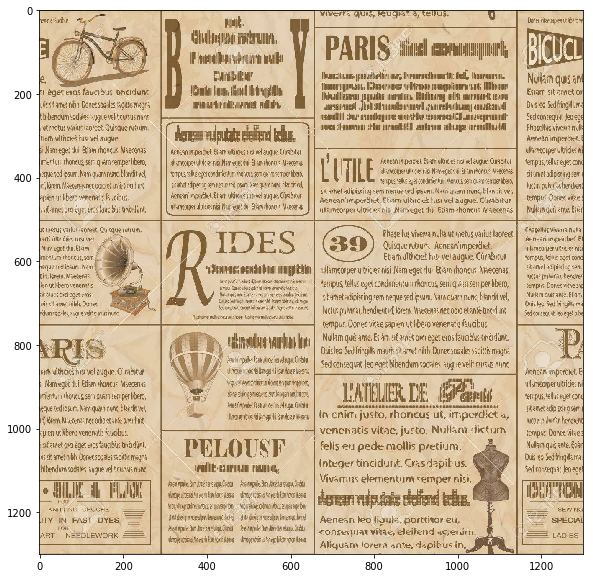

In [4]:
img_text = cv2.imread('text.jpg')
img_text = cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)
display(img_text)

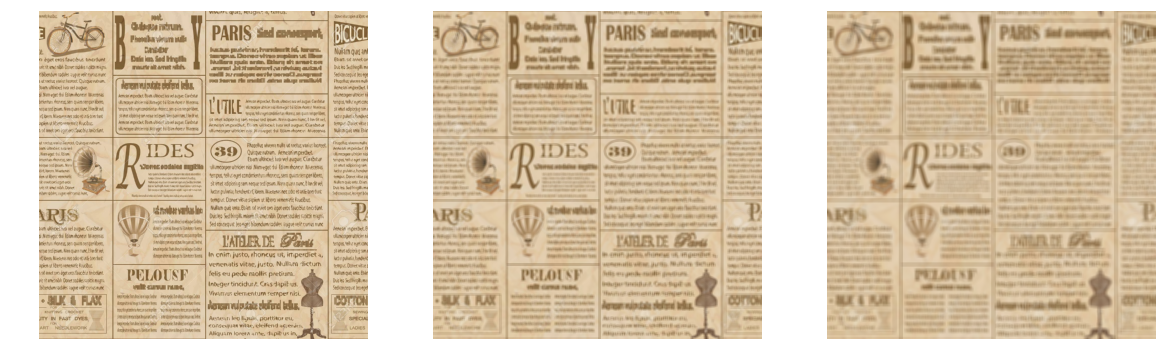

In [5]:
img = img_text.copy()
kernels = [5, 11, 17]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

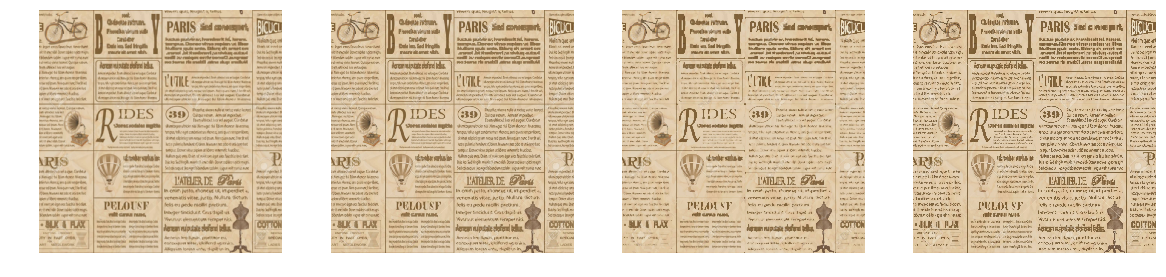

In [6]:
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, 75, 75)
images = [img_0, img_1, img_2, img_3]

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.axis('off')
    ax.imshow(p)

plt.show()

# Threshold 

In [7]:
img = cv2.imread('gradation.png')

In [8]:
# Thresholding
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

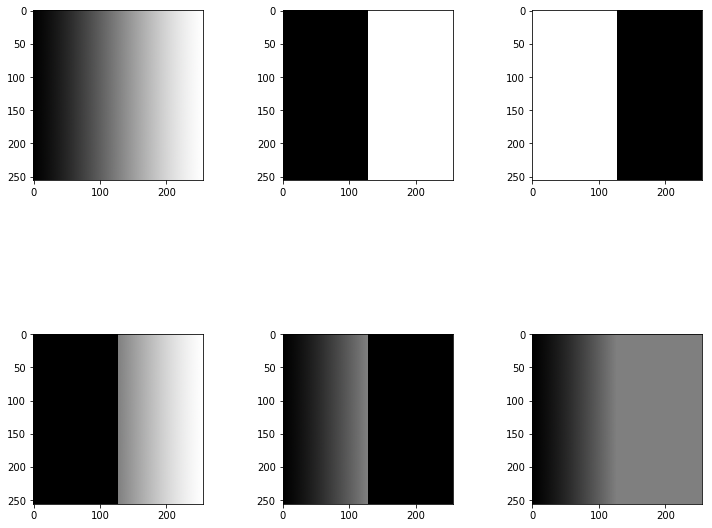

In [9]:
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))

for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
    
plt.tight_layout(w_pad = 5)
plt.show()

In [10]:
img_text = cv2.imread('text.jpg')
img = cv2.cvtColor(img_text, cv2.COLOR_BGR2GRAY)

# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 7, 8)

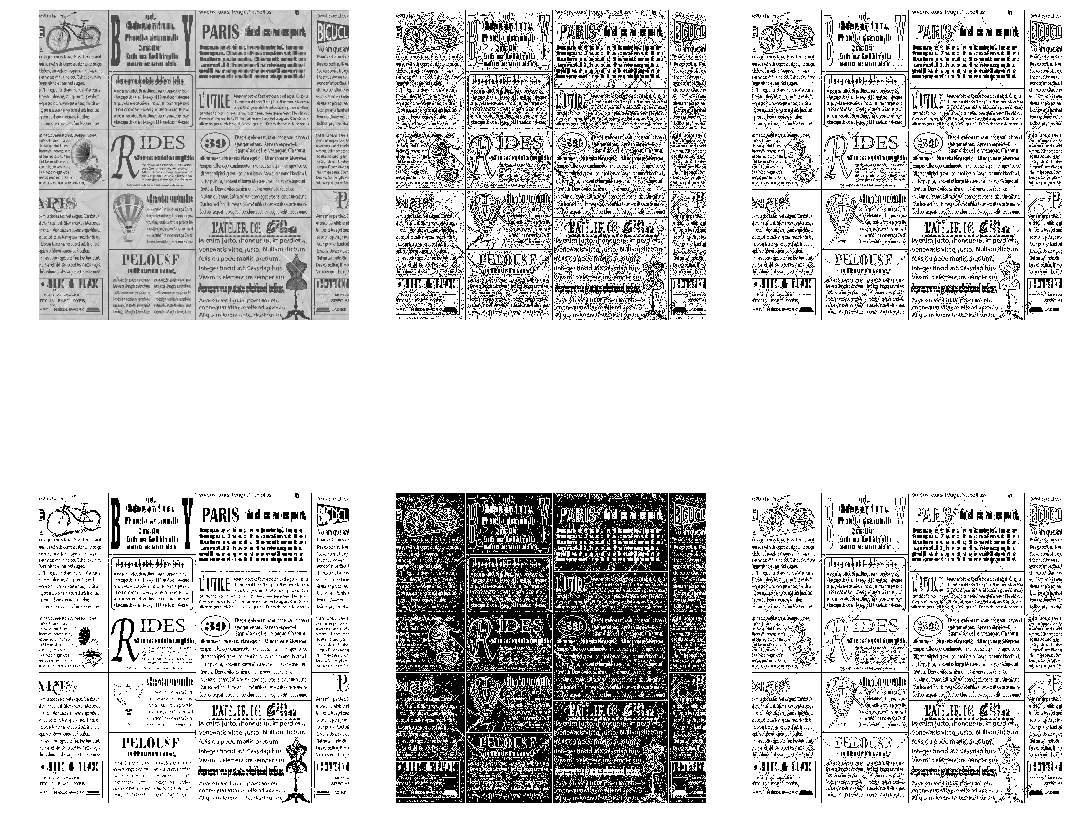

In [41]:
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))

for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

# Morphological Operation

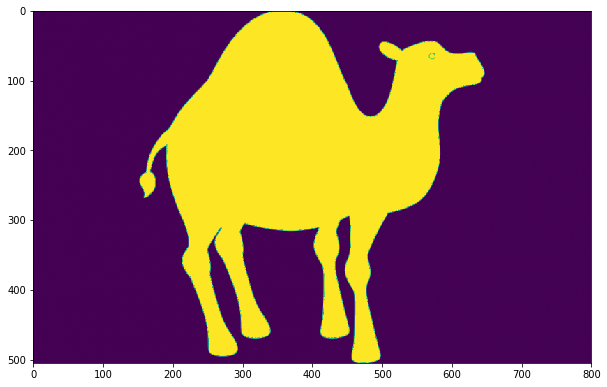

In [69]:
camel = cv2.imread('camel.png', 0)
camel = display(255 - camel)

In [70]:
kernel = np.ones((5, 5), np.uint8)

camel_2 = cv2.erode(camel, kernel, iterations = 3)
camel_3 = cv2.erode(camel, kernel, iterations = 5)

images = [camel, camel_2, camel_3]
plt.figure(figsize = (15, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\matrix.cpp:755: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


In [65]:
camel_open = cv2.morphologyEx(camel, cv2.MORPH_OPEN, kernel)
camel_close = cv2.morphologyEx(camel, cv2.MORPH_CLOSE, kernel)
camel_grad = cv2.morphologyEx(camel, cv2.MORPH_GRADIENT,kernel)
camel_tophat = cv2.morphologyEx(camel, cv2.MORPH_TOPHAT, kernel)
camel_blackhat = cv2.morphologyEx(camel, cv2.MORPH_BLACKHAT, kernel)

images = [camel, camel_open, camel_close, camel_grad, camel_tophat, camel_blackhat]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))

for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\matrix.cpp:755: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


## Gradient

In [28]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

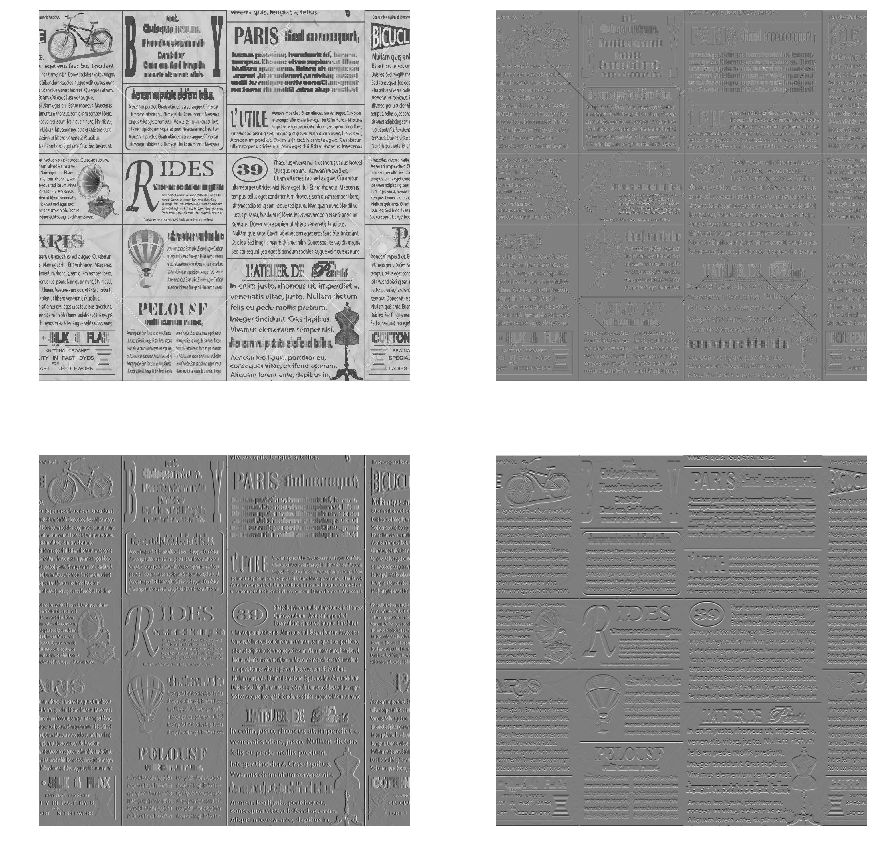

In [44]:
images = [img, laplacian, sobel_x, sobel_y]
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))

for ind, s in enumerate(images):
    ax = axs[ind//2, ind%2]
    ax.imshow(s, cmap = 'gray')
    ax.axis('off')
    
plt.show()

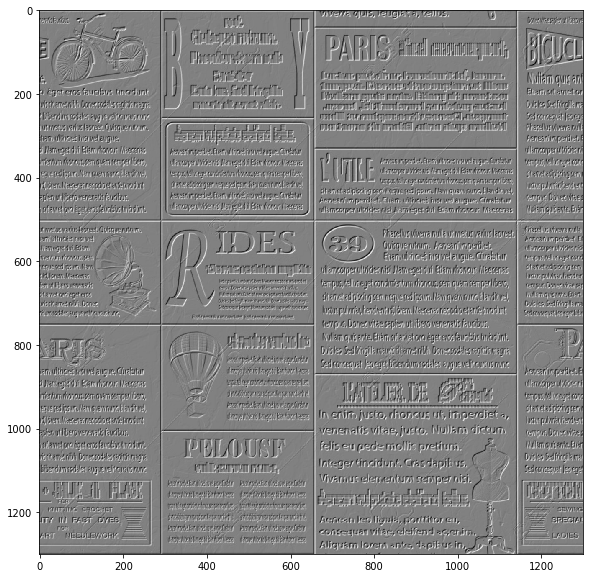

In [39]:
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)
display(blended, cmap = 'gray')